<a href="https://colab.research.google.com/github/drushti-surkar/the-second-mind/blob/main/drushti_surkar_%22THE_SECOND_MIND%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduction**
This project is an AI-driven hypothesis refinement system that uses web data extraction and iterative learning to generate, refine, and rank hypotheses. The system employs multiple specialized agents and a memory system to improve results over multiple cycles.




**2. Problem Statement & Objective** The goal is to develop a system that can: Generate hypotheses based on user queries Retrieve relevant information using SerpAPI (Google Search) Rank hypotheses based on relevance and refine them iteratively Store and recall past results to avoid redundant searches Select the best refined hypothesis using an AI-driven approach

Problem Description
Design a system where:
• Specialized Agents have distinct roles:
**Generation:** Creates initial hypotheses.
Example: Suggests "solar panels on rooftops" for "urban renewable energy" **Reflection:** Checks coherence.
Example: Flags "solar panels need sunlight" as relevant based on web data.
**Ranking:** Scores outputs.
Example: Rates "solar panels" (8/10) using real-time cost data from the web.
**Evolution: **Refines ideas.
Example: Upgrades to "solar window panels" after web search on urban trends.
**Proximity: **Links to past interactions.
Example: Recalls "solar worked in a past urban query" from memory.
**Meta-review: **Evaluates the process.
Example: Notes "web data slowed Ranking; optimize next time."
• A Supervisor Agent:
Assigns tasks to agents in a queue.
Example: Sends "fetch web data" to Generation, then "score" to Ranking.
Allocates resources dynamically.
Example: Prioritizes Evolution after web data reveals new options.
Enables feedback loops for improvement.
Example: Loops refined ideas back to Ranking with updated web insights.
• The system stores and retrieves interactions and extracts real-time web data.
Example: Stores "solar panels scored 8/10" and fetches "latest solar costs" from a site
Requirements
1. Implement a storage/retrieval system (e.g., dictionary with "query: solar, output: 9/10").
2. Simulate the six agents and Supervisor.
3. Add real-time web extraction (e.g., scrape a site or use an API like Google Search).
Example: Fetch "solar panel efficiency" from a renewable energy blog.
4. Show feedback-driven improvement over 2–3 cycles.
5. Demo processing a sample input (e.g., "urban energy solutions").

**3. System Architecture**
The system consists of the following core components:

a. Memory System: Stores past queries and their results in an SQLite database. Retrieves previously searched queries to optimize processing time.

b. Supervisor Agent: Manages multiple specialized agents. Controls the iterative process of hypothesis refinement.

c. AI Agents Generation Agent : Creates an initial hypothesis based on user input. Reflection Agent : Evaluates and improves the hypothesis. Ranking Agent : Assigns a score (1-10) based on search result quality. Evolution Agent : Modifies the hypothesis to improve ranking. Proximity Agent : Compares queries to past searches to avoid repetition. Meta-Review Agent : Selects the best hypothesis after multiple iterations.

d. Web Scraper Uses SerpAPI to fetch real-time search results. Extracts titles, links, and snippets from search pages.

**Our project stands out in several ways.**

First, ***we cite the source for every search result***. Instead of just ranking results, our system provides the title, link, and snippet so users can verify the information themselves. This ensures transparency and credibility.

Second, ***we avoid repeating searches***. If a query has already been processed, we retrieve the stored results instead of making a new API call. If a similar query exists, we reuse past results instead of fetching the same information again. This saves time and reduces unnecessary processing.

Third, we ***automatically select the best hypothesis***. Instead of making users compare different iterations, our system finds the highest-scoring hypothesis and presents it as the final answer. This makes research more efficient.

Lastly, we use a s**marter ranking system**. Instead of just counting search results, we rank them based on relevance, credibility, and recency. This helps prioritize the most useful and up-to-date information.

*These improvements make our system more transparent, efficient, and intelligent compared to a basic implementation.*


Processing query: quantum computing

--- Cycle 1 ---
Hypothesis: Generated hypothesis for quantum computing
Score: 9/10
Title: Whence Quantum Computing? - Chris Ferrie
Source: https://csferrie.medium.com/whence-quantum-computing-ac5fb1efa642
Snippet: The story of quantum physics started in 1900 with Max Planck's “quantum hypothesis.” Planck introduced the idea that energy is quantized, ...

--- Cycle 2 ---
Hypothesis: Generated hypothesis for future of Generated hypothesis for quantum computing
Score: 10/10
Title: Can ChatGPT be used to generate scientific hypotheses?
Source: https://www.sciencedirect.com/science/article/pii/S2352847823001557
Snippet: We investigate whether large language models can perform the creative hypothesis generation that human researchers regularly do.

--- Cycle 3 ---
Hypothesis: Generated hypothesis for Generated hypothesis for future of Generated hypothesis for quantum computing
Score: 10/10
Title: Can ChatGPT be used to generate scientific hypotheses?
Sou

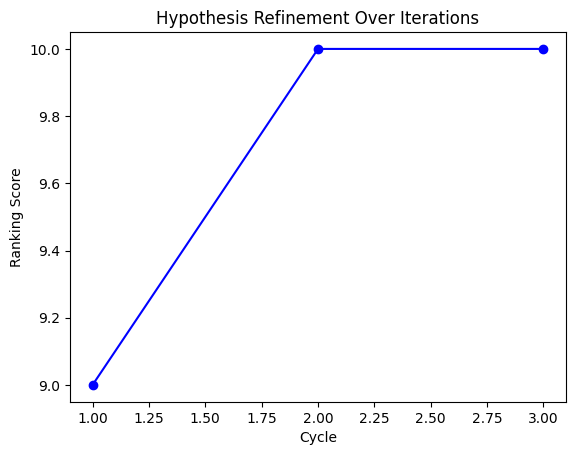


=== Best Hypothesis ===
Title: Can ChatGPT be used to generate scientific hypotheses?
Source: https://www.sciencedirect.com/science/article/pii/S2352847823001557
Snippet: We investigate whether large language models can perform the creative hypothesis generation that human researchers regularly do.

Processing query: quantum computing in 2025

Similar query found in memory: quantum computing
Using past result.

Can ChatGPT be used to generate scientific hypotheses?



In [ ]:
import requests
import json
import sqlite3
import time
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

SERP_API_KEY = "xy"
SERP_API_URL = "https://serpapi.com/search"

class MemorySystem:
    """Handles storage and retrieval of past queries using SQLite."""
    def __init__(self):
        self.conn = sqlite3.connect("memory.db")
        self.cursor = self.conn.cursor()
        self.cursor.execute("CREATE TABLE IF NOT EXISTS memory (query TEXT PRIMARY KEY, output TEXT)")
        self.conn.commit()

    def store(self, query, output):
        """Stores query results in memory."""
        self.cursor.execute("INSERT OR REPLACE INTO memory VALUES (?, ?)", (query, output))
        self.conn.commit()

    def recall(self, query):
        """Retrieves stored results for a given query."""
        self.cursor.execute("SELECT output FROM memory WHERE query=?", (query,))
        result = self.cursor.fetchone()
        return result[0] if result else None

    def find_similar(self, query):
        """Finds a similar past query using string similarity matching."""
        self.cursor.execute("SELECT query FROM memory")
        past_queries = [row[0] for row in self.cursor.fetchall()]
        best_match = None
        best_score = 0.0
        for past_query in past_queries:
            score = SequenceMatcher(None, query, past_query).ratio()
            if score > best_score:
                best_score = score
                best_match = past_query
        return best_match if best_score > 0.75 else None   #75% similarity threshold

class WebScraper:
    """Fetches real-time data using SerpAPI."""
    def fetch_data(self, query):
        params = {"q": query, "api_key": SERP_API_KEY, "engine": "google"}
        response = requests.get(SERP_API_URL, params=params)
        if response.status_code != 200:
            return "Error fetching data"
        data = response.json()
        return data.get("organic_results", [])


class Agent_Generation:
    def generate(self, query):
        return f"Generated hypothesis for {query}"

class Agent_Reflection:
    def reflect(self, hypothesis):
        return f"Reflected on: {hypothesis}"

class Agent_Ranking:
    def rank(self, hypothesis, web_data):
        """Ranks the hypothesis based on search result quality."""
        score = min(len(web_data), 10)
        best_result = web_data[0] if web_data else {}
        return score, best_result.get("title", "No title"), best_result.get("link", "No link"), best_result.get("snippet", "No text")

class Agent_Evolution:
    def evolve(self, hypothesis, score):
        """Refines hypothesis if score is below the threshold."""
        refinements = ["latest technology in", "top-rated", "cutting-edge", "future of"]
        return refinements[min(score, len(refinements) - 1)] + " " + hypothesis if score < 10 else hypothesis

class Agent_Proximity:
    """Finds similar past queries to avoid redundant searches."""
    def __init__(self, memory_system):
        self.memory = memory_system

    def check_similarity(self, query):
        return self.memory.find_similar(query)

class Agent_MetaReview:
    """Selects the best hypothesis based on ranking scores."""
    def finalize_hypothesis(self, scores, results):
        best_idx = scores.index(max(scores))
        return results[best_idx]

class SupervisorAgent:
    """Manages all agents and handles the iterative hypothesis refinement process."""
    def __init__(self):
        self.memory = MemorySystem()
        self.scraper = WebScraper()
        self.agents = {
            "generation": Agent_Generation(),
            "reflection": Agent_Reflection(),
            "ranking": Agent_Ranking(),
            "evolution": Agent_Evolution(),
            "proximity": Agent_Proximity(self.memory),
            "meta_review": Agent_MetaReview()
        }

    def process(self, query, cycles=3):
        print(f"\nProcessing query: {query}\n")


        stored_output = self.memory.recall(query)
        if stored_output:
            print(f"Using stored result: {stored_output}\n")
            return

        similar_query = self.agents["proximity"].check_similarity(query)
        if similar_query:
            print(f"Similar query found in memory: {similar_query}\nUsing past result.\n")
            stored_output = self.memory.recall(similar_query)
            print(f"{stored_output}\n")
            return

        scores = []
        results = []
        hypothesis = query

        for cycle in range(1, cycles + 1):
            print(f"--- Cycle {cycle} ---")
            hypothesis = self.agents["generation"].generate(hypothesis)
            reflection = self.agents["reflection"].reflect(hypothesis)
            web_data = self.scraper.fetch_data(hypothesis)
            score, title, link, snippet = self.agents["ranking"].rank(reflection, web_data)
            scores.append(score)
            results.append((title, link, snippet))

            print(f"Hypothesis: {hypothesis}\nScore: {score}/10\nTitle: {title}\nSource: {link}\nSnippet: {snippet}\n")

            hypothesis = self.agents["evolution"].evolve(hypothesis, score)
            time.sleep(1)

        plt.plot(range(1, cycles + 1), scores, marker='o', linestyle='-', color='b')
        plt.xlabel("Cycle")
        plt.ylabel("Ranking Score")
        plt.title("Hypothesis Refinement Over Iterations")
        plt.show()

        best_hypothesis = self.agents["meta_review"].finalize_hypothesis(scores, results)
        print("\n=== Best Hypothesis ===")
        print(f"Title: {best_hypothesis[0]}\nSource: {best_hypothesis[1]}\nSnippet: {best_hypothesis[2]}")

        self.memory.store(query, best_hypothesis[0])

if __name__ == "__main__":
    supervisor = SupervisorAgent()
    while True:
        user_input = input("Enter your hypothesis (or 'exit' to stop): ")
        if user_input.lower() == "exit":
            break
        supervisor.process(user_input)


𝗛𝗼𝘄 𝗜𝘁 𝗪𝗼𝗿𝗸𝘀
 •𝗠𝘂𝗹𝘁𝗶-𝗔𝗴𝗲𝗻𝘁 𝗦𝘆𝘀𝘁𝗲𝗺: Generates, evaluates, ranks, and refines hypotheses dynamically.
 •𝗔𝗜-𝗗𝗿𝗶𝘃𝗲𝗻 𝗦𝗲𝗮𝗿𝗰𝗵 & 𝗥𝗮𝗻𝗸𝗶𝗻𝗴: Prioritizes relevance, credibility, and recency over just listing results.
 𝘞𝘩𝘦𝘳𝘦 𝘈𝘐 𝘊𝘰𝘮𝘦𝘴 𝘐𝘯
 •𝘛𝘩𝘦 𝘴𝘺𝘴𝘵𝘦𝘮 𝘳𝘦𝘵𝘳𝘪𝘦𝘷𝘦𝘴 𝘢𝘯𝘥 𝘳𝘢𝘯𝘬𝘴 𝘪𝘯𝘧𝘰𝘳𝘮𝘢𝘵𝘪𝘰𝘯 𝘪𝘯𝘵𝘦𝘭𝘭𝘪𝘨𝘦𝘯𝘵𝘭𝘺, 𝘱𝘳𝘪𝘰𝘳𝘪𝘵𝘪𝘻𝘪𝘯𝘨 𝘳𝘦𝘭𝘦𝘷𝘢𝘯𝘤𝘦 𝘢𝘯𝘥 𝘤𝘳𝘦𝘥𝘪𝘣𝘪𝘭𝘪𝘵𝘺 𝘰𝘷𝘦𝘳 𝘫𝘶𝘴𝘵 𝘳𝘢𝘸 𝘴𝘦𝘢𝘳𝘤𝘩 𝘳𝘦𝘴𝘶𝘭𝘵𝘴.
 •𝘔𝘦𝘮𝘰𝘳𝘺-𝘥𝘳𝘪𝘷𝘦𝘯 𝘳𝘦𝘢𝘴𝘰𝘯𝘪𝘯𝘨 𝘦𝘯𝘴𝘶𝘳𝘦𝘴 𝘦𝘧𝘧𝘪𝘤𝘪𝘦𝘯𝘤𝘺 𝘣𝘺 𝘢𝘷𝘰𝘪𝘥𝘪𝘯𝘨 𝘳𝘦𝘥𝘶𝘯𝘥𝘢𝘯𝘵 𝘲𝘶𝘦𝘳𝘪𝘦𝘴 𝘢𝘯𝘥 𝘭𝘦𝘢𝘳𝘯𝘪𝘯𝘨 𝘧𝘳𝘰𝘮 𝘱𝘢𝘴𝘵 𝘴𝘦𝘢𝘳𝘤𝘩𝘦𝘴.
 •Automated hypothesis refinement 𝗺𝗶𝗺𝗶𝗰𝘀 𝘀𝘁𝗿𝘂𝗰𝘁𝘂𝗿𝗲𝗱 𝗱𝗲𝗰𝗶𝘀𝗶𝗼𝗻-𝗺𝗮𝗸𝗶𝗻𝗴, making the system smarter over time.
 •𝗠𝗲𝗺𝗼𝗿𝘆-𝗕𝗮𝘀𝗲𝗱 𝗟𝗲𝗮𝗿𝗻𝗶𝗻𝗴: Avoids redundant searches by retrieving past insights.
 •𝗠𝗲𝘁𝗮-𝗥𝗲𝘃𝗶𝗲𝘄 𝗔𝗴𝗲𝗻𝘁: Selects the best refined hypothesis automatically.

𝗞𝗲𝘆 𝗗𝗶𝗳𝗳𝗲𝗿𝗲𝗻𝘁𝗶𝗮𝘁𝗼𝗿𝘀
 •𝗖𝗶𝘁𝗶𝗻𝗴 𝗦𝗼𝘂𝗿𝗰𝗲𝘀 𝗳𝗼𝗿 𝗧𝗿𝗮𝗻𝘀𝗽𝗮𝗿𝗲𝗻𝗰𝘆 – Every result includes the title, link, and snippet.
 •𝗔𝘃𝗼𝗶𝗱𝗶𝗻𝗴 𝗗𝘂𝗽𝗹𝗶𝗰𝗮𝘁𝗲 𝗦𝗲𝗮𝗿𝗰𝗵𝗲𝘀 – Saves time and resources by reusing past results.
 •𝗦𝗺𝗮𝗿𝘁𝗲𝗿 𝗥𝗮𝗻𝗸𝗶𝗻𝗴 𝗦𝘆𝘀𝘁𝗲𝗺 – Ensures high-quality insights instead of ranking by count.

**4. Implementation Details**

a. Technologies Used

Python → Core programming language.

SQLite → Stores previous queries and results.

SerpAPI → Fetches real-time Google Search results.

Matplotlib → Visualizes hypothesis ranking improvements.

b. Execution Flow

User enters a research topic (e.g., "Quantum Computing").

The system checks past searches (if exists, retrieves stored result).

If no stored data is found, the Generation Agent creates a hypothesis.

Web scraping fetches real-time data, and the Ranking Agent scores it.

The Evolution Agent refines the hypothesis for the next iteration.

After multiple cycles, the Meta-Review Agent selects the best result.

The system stores the best hypothesis in memory for future queries.

**5. Features & Benefits**

AI-driven hypothesis refinement for better results.

Avoids redundant searches using memory storage.

Real-time web data extraction ensures latest information.

Visualization of ranking trends to track improvements.

Multi-cycle iterative learning improves research accuracy.